# Data Analysis
## Kaggle report notebook

In [510]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

# Introduce yourself

**Odintsovo-1**

Team members:
1. *Victoria Bunyaeva*, 162

# Task

In this task we are working with posts on famous russian advertisement and resell platform.

Ginen information about the post and corresponding item you have to estimate its probability to be sold in 3 days.

Below you will find some desirable stages of your report.

# Data Loading

In [350]:
data = pd.read_csv("train.tsv", sep='\t')

data.head()

,Unnamed: 0,category_id,city,date_created,delivery_available,desc_text,img_num,lat,long,name_text,owner_id,payment_available,price,product_id,product_type,properties,region,sold_mode,subcategory_id,sold_fast
0,1,4,Краснодар,2018-10-08,False,"Продаю стол раскладной, деревянный, советский ...",3,45.0686,38.9518,Стол,4ce583fe8231a0cc4a3c7d241c7d0289,True,500.0,8cb80c05c65c210275f5500779d6b593,1,"[{'slug_id': 'stoly_stulya_tip', 'slug_name': ...",Краснодарский край,1,410,1
1,2,4,Тюмень,2018-06-18,False,"Тарелки глубокие 6 шт. Блюдца, чашки по 6 шт. ...",2,57.1840,65.5674,Посуда,e58be2c8f143c17246dc2243b5d3b98f,False,300.0,3b7a9f8b27a53b63525f95bc8070abb2,1,"[{'slug_id': 'dom_dacha_posuda_tip', 'slug_nam...",Тюменская область,1,405,0
2,4,9,Омск,2018-07-31,True,"Новый,с этикеткой. Размер L. Не подошёл по раз...",1,54.9889,73.4312,Костюм,51b408796027214232532b7e478e2159,True,1100.0,c97dd9c5a3e938c52cf5d7822bc0eb7b,1,[{'slug_id': 'zhenskaya_odezhda_pidzhaki_kosty...,Омская область,1,908,0
3,6,3,Санкт-Петербург,2018-04-17,False,"Складывается тростью, все колеса вниз. Сплошна...",4,59.9590,30.4877,Коляска,6544b83acbbf04439a7ba983093cafb4,True,5000.0,3e5d0286b25fd7f62f88bc436a59ae4e,1,"[{'slug_id': 'waggon_type', 'slug_name': 'Тип'...",Ленинградская область,1,312,0
4,10,5,Москва,2018-02-09,False,"Неразлучники, птичкам по 1,5 года. Продаю с бо...",2,55.6473,37.4118,Волнистые попугаи,ea575e28daf1f47bfce63015cd3ce5cf,True,2000.0,57b4a8679d0d3eb1e31367b57221098f,1,[],Московская область,1,504,0


# Descriptive Data Analysis

* Analyze train dataset features
    * Provide some meaningfull description about corresponding features (in form of pictures or some coefficients)
    * Outline any findings you are able to reveal
* Try to measure analyse any correspondense between features and target features

`desc_text` and `name_text` are pretty messy natural language. `properties` seem to just contain slugs, which are unique and irrelevant.

In [ ]:
data.drop(columns=["Unnamed: 0", 'desc_text', 'name_text', 'properties'], inplace=True)

In [356]:
data.head()

,category_id,city,date_created,delivery_available,img_num,lat,long,owner_id,payment_available,price,product_id,product_type,region,sold_mode,subcategory_id,sold_fast
0,4,Краснодар,2018-10-08,False,3,45.0686,38.9518,4ce583fe8231a0cc4a3c7d241c7d0289,True,500.0,8cb80c05c65c210275f5500779d6b593,1,Краснодарский край,1,410,1
1,4,Тюмень,2018-06-18,False,2,57.1840,65.5674,e58be2c8f143c17246dc2243b5d3b98f,False,300.0,3b7a9f8b27a53b63525f95bc8070abb2,1,Тюменская область,1,405,0
2,9,Омск,2018-07-31,True,1,54.9889,73.4312,51b408796027214232532b7e478e2159,True,1100.0,c97dd9c5a3e938c52cf5d7822bc0eb7b,1,Омская область,1,908,0
3,3,Санкт-Петербург,2018-04-17,False,4,59.9590,30.4877,6544b83acbbf04439a7ba983093cafb4,True,5000.0,3e5d0286b25fd7f62f88bc436a59ae4e,1,Ленинградская область,1,312,0
4,5,Москва,2018-02-09,False,2,55.6473,37.4118,ea575e28daf1f47bfce63015cd3ce5cf,True,2000.0,57b4a8679d0d3eb1e31367b57221098f,1,Московская область,1,504,0


### `price`

Let's look at these prices.

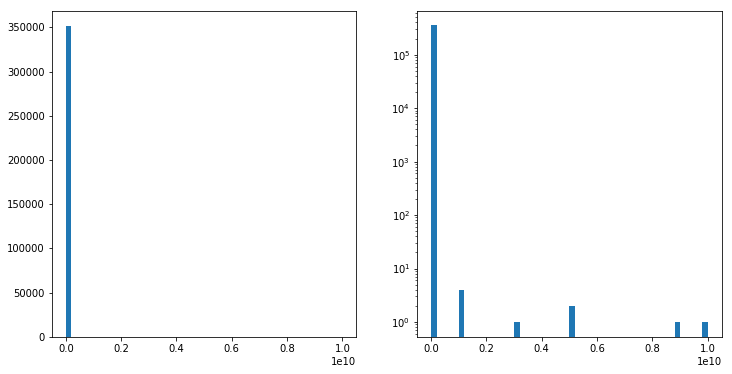

In [357]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(data['price'].values, bins=50)

plt.subplot(1, 2, 2)
plt.hist(data['price'].values, log=True, bins=50)
plt.show()

Let's try to remove some outliers.

In [358]:
len(data)

351281

In [359]:
from scipy.stats import zscore

data = data[np.abs(zscore(data['price'])) < 3]
len(data)

351268

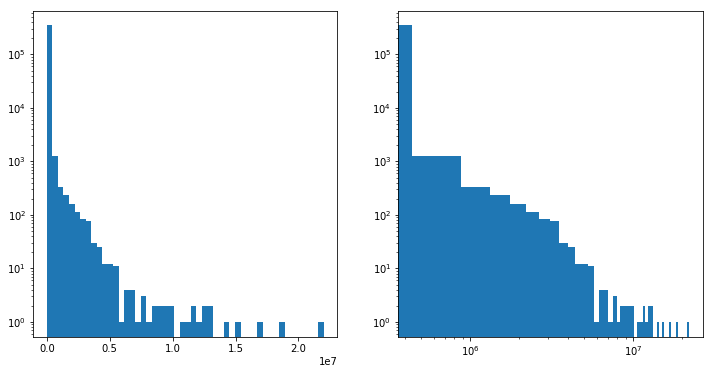

In [360]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(data['price'].values, log=True, bins=50)

plt.subplot(1, 2, 2)
plt.xscale('log')
plt.hist(data['price'].values, log=True, bins=50)

plt.show()

In [361]:
def plot_hists(f_data, *, bins, log=True):
    plt.figure(figsize=(10, 7))

    for v, label in enumerate(["Didn't sell", "Sold"]):
        plt.hist(f_data(data[data['sold_fast'] == v]).values,
                 density=True,
                 log=log,
                 bins=bins,
                 alpha=0.5,
                 label="{} ({:d})".format(label, v))

    plt.legend()
    plt.show()

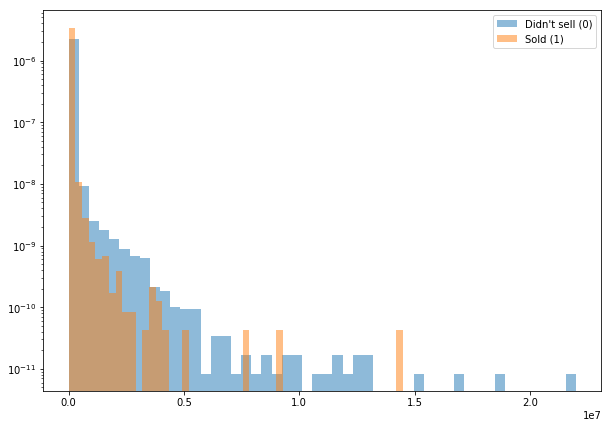

In [362]:
plot_hists(lambda data: data['price'], bins=50)

The distribution still looks quite strange, but let's leave it like this for now.

### `date_created`

The dates must be converted from strings into something usable.

Let's first convert each date into number of days since the start of the year. Thus, the actual order and distance of dates is reflected.

Note that the itself year is irrelevant, as all the data points are within one year.

In [363]:
from datetime import datetime

date_start = datetime.fromisoformat(min(data['date_created']))

def get_orddate(date):
    return (datetime.fromisoformat(date) - date_start).days

data['day_created'] = data['date_created'].apply(get_orddate)

data.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,category_id,city,date_created,delivery_available,img_num,lat,long,owner_id,payment_available,price,product_id,product_type,region,sold_mode,subcategory_id,sold_fast,day_created
0,4,Краснодар,2018-10-08,False,3,45.0686,38.9518,4ce583fe8231a0cc4a3c7d241c7d0289,True,500.0,8cb80c05c65c210275f5500779d6b593,1,Краснодарский край,1,410,1,280
1,4,Тюмень,2018-06-18,False,2,57.1840,65.5674,e58be2c8f143c17246dc2243b5d3b98f,False,300.0,3b7a9f8b27a53b63525f95bc8070abb2,1,Тюменская область,1,405,0,168
2,9,Омск,2018-07-31,True,1,54.9889,73.4312,51b408796027214232532b7e478e2159,True,1100.0,c97dd9c5a3e938c52cf5d7822bc0eb7b,1,Омская область,1,908,0,211
3,3,Санкт-Петербург,2018-04-17,False,4,59.9590,30.4877,6544b83acbbf04439a7ba983093cafb4,True,5000.0,3e5d0286b25fd7f62f88bc436a59ae4e,1,Ленинградская область,1,312,0,106
4,5,Москва,2018-02-09,False,2,55.6473,37.4118,ea575e28daf1f47bfce63015cd3ce5cf,True,2000.0,57b4a8679d0d3eb1e31367b57221098f,1,Московская область,1,504,0,39


Now, are the dates significant at all?

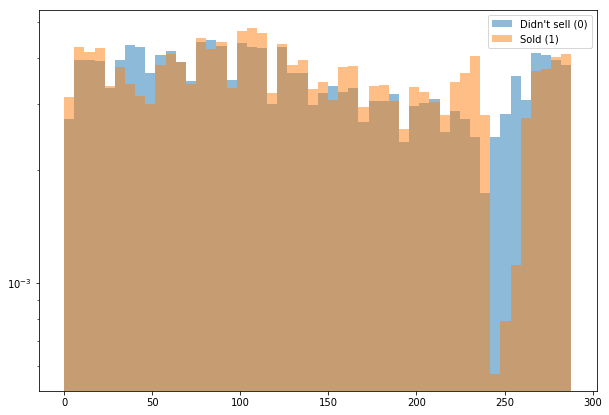

In [364]:
plot_hists(lambda data: data['day_created'], bins=50)

Seems like it.

To help the model account for possible seasonality, extract the weekday as a separate feature.

In [365]:
def get_weekday(date):
    return datetime.fromisoformat(date).weekday()

data['weekday_created'] = data['date_created'].apply(get_weekday)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


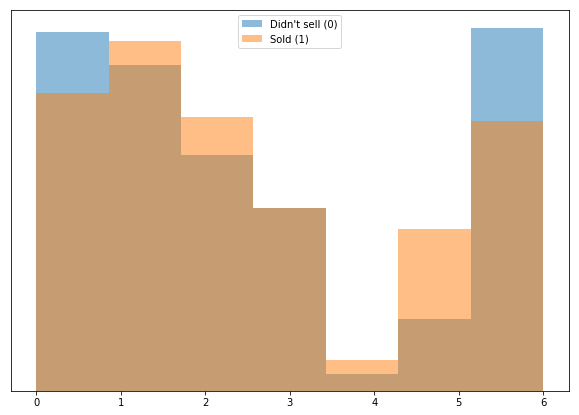

In [366]:
plot_hists(lambda data: data['weekday_created'], bins=7)

What about day of the month? Sales, especially as trivial as these, are generally affected by salary patterns, which are decidedly monthly in Russia.

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


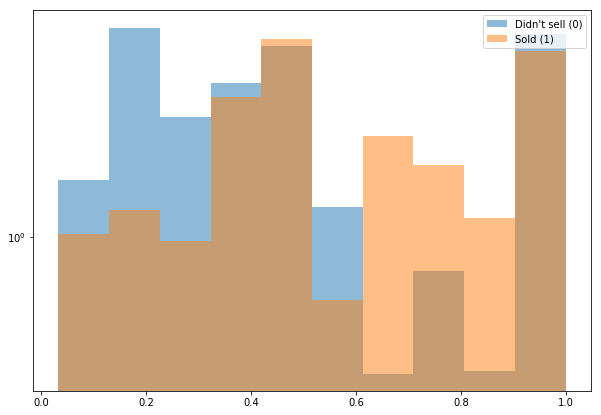

In [367]:
month_lengths = (31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31)

def get_monthday(date):
    d = datetime.fromisoformat(date)
    
    return d.day / month_lengths[d.month - 1]

data['monthday_created'] = data['date_created'].apply(get_monthday)

plot_hists(lambda data: data['monthday_created'], bins=10)

In [368]:
data.drop(columns=['date_created'], inplace=True)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [369]:
data.head()

,category_id,city,delivery_available,img_num,lat,long,owner_id,payment_available,price,product_id,product_type,region,sold_mode,subcategory_id,sold_fast,day_created,weekday_created,monthday_created
0,4,Краснодар,False,3,45.0686,38.9518,4ce583fe8231a0cc4a3c7d241c7d0289,True,500.0,8cb80c05c65c210275f5500779d6b593,1,Краснодарский край,1,410,1,280,0,0.258065
1,4,Тюмень,False,2,57.1840,65.5674,e58be2c8f143c17246dc2243b5d3b98f,False,300.0,3b7a9f8b27a53b63525f95bc8070abb2,1,Тюменская область,1,405,0,168,0,0.600000
2,9,Омск,True,1,54.9889,73.4312,51b408796027214232532b7e478e2159,True,1100.0,c97dd9c5a3e938c52cf5d7822bc0eb7b,1,Омская область,1,908,0,211,1,1.000000
3,3,Санкт-Петербург,False,4,59.9590,30.4877,6544b83acbbf04439a7ba983093cafb4,True,5000.0,3e5d0286b25fd7f62f88bc436a59ae4e,1,Ленинградская область,1,312,0,106,1,0.566667
4,5,Москва,False,2,55.6473,37.4118,ea575e28daf1f47bfce63015cd3ce5cf,True,2000.0,57b4a8679d0d3eb1e31367b57221098f,1,Московская область,1,504,0,39,4,0.321429


### `region`

Let's use the fact that we more or less know the set of legal values for `region` to remove some errors.

In [370]:
data['region'].nunique()

109

In [371]:
def count_occurrences(values):
    ocs = {}

    for v in values:
        ocs[v] = ocs.get(v, 0) + 1
    
    return ocs

In [372]:
ocs_rs = count_occurrences(data['region'].values)

for reg, c in sorted(ocs_rs.items(), key=lambda p: p[1])[:40]:
    print(reg, c)

Красный Кут 1
Абинск 1
Челябинск 1
Бор 1
Ржев 1
Тюмень 1
Электросталь 1
Биокомбината 1
Дубна 1
Кировск 1
Асбест 1
Сысерть 1
Рязань 1
Оренбург 1
Иваново 1
Уфа 1
Томск 1
Череповец 1
Пенза 1
Пушкино 1
Астрахань 2
Красноярск 2
Казань 2
Хабаровск 2
Курган 2
Воронеж 2
Волгоград 5
Ингушетия 19
Россия 31
Калмыкия 33
Республика Тыва 68
Ненецкий автономный округ 82
Республика Алтай 124
Карачаево-Черкесия 160
Чечня 160
Еврейская автономная область 303
Кабардино-Балкария 377
Камчатский край 440
Марий Эл 584
Северная Осетия 594


In [373]:
trash_regions = [reg for reg, ocs in ocs_rs.items() if ocs <= 5] + ["Россия"]

data = data[~data['region'].isin(trash_regions)]

In [374]:
data['region'].nunique()

81

### `city`

As is consistent with Russia's demographic structure and other factors, the `city` feature takes a small number of frequent values (mostly, each region's largest city) and a large number of rare values.

In [375]:
len(data[data['city'] == "Москва"]) / len(data)

0.13374430523917996

In [376]:
len(data[data['city'] == "Вологда"]) / len(data[data['region'] == "Вологодская область"])

0.5635540929658577

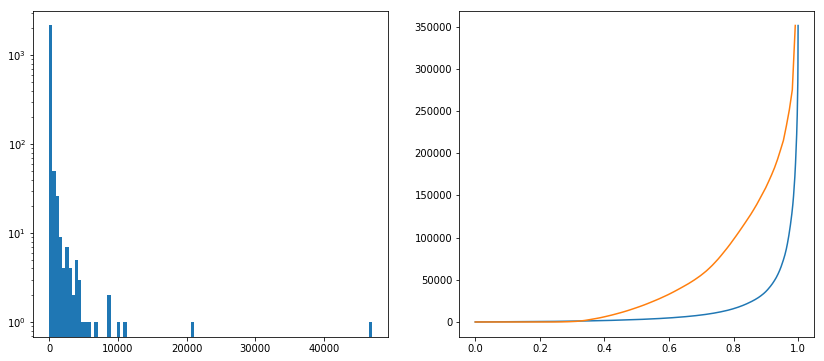

In [377]:
ocs_cs = count_occurrences(data['city'].values)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(ocs_cs.values(), bins=100, log=True)

from functools import reduce

def prefix_sums(xs):
    return reduce(lambda ss, x: ss + [(ss[-1] if ss else 0) + x], xs, [])

plt.subplot(1, 2, 2)
plt.plot([i / len(ocs_cs) for i in range(len(ocs_cs))], prefix_sums(sorted(ocs_cs.values())))
plt.plot([i / len(ocs_rs) for i in range(len(ocs_rs))], prefix_sums(sorted(ocs_rs.values())))

plt.show()

Thus, using `city` as the *nominal* feature it is would barely add anything in addition to `region`.

Nevertheless, `city` can still be used with a city dataset to create a whole range of potentially relevant features.

In [378]:
# Scraped from here:
#   https://data.opendatasoft.com/explore/dataset/geonames-all-cities-with-a-population-1000%40public/api/
# then supplemented manually from Russian Wikipedia

cities = pd.read_csv("cities_info.csv", index_col='name')

cities.head()

,lat,long,pop
name,,,
Абадзехская,44.39389,40.22139,4010
Абаза,52.65500,90.09278,18094
Абакан,53.83651,91.39077,14696
Абан,56.67870,96.06580,9670
Абдулино,53.70000,53.66667,21195


Distance from the location to the center of the city

In [387]:
from sklearn.neighbors import DistanceMetric

dist = DistanceMetric.get_metric('haversine')

city_data = {}

for row in cities.itertuples():
    city_data[row[0]] = {
        'lat': row[1],
        'long': row[2],
        'pop': row[3]
    }

def get_dist_city(row):
    city = row['city']
    lat, long = city_data[city]['lat'], city_data[city]['long']
    
    return dist.pairwise([[row['lat'], row['long']], [lat, long]])[1, 0] * 6371

In [388]:
data['dist_city'] = data.apply(get_dist_city, axis=1)

The city's population

In [390]:
data['pop_city'] = data['city'].apply(lambda city: city_data[city]['pop'])

The distance between the city and Moscow

In [391]:
m_lat, m_long = cities.loc["Москва"][['lat', 'long']]

# print(m_lat, m_long)

def get_dist_moscow(row):
    city = row['city']
    lat, long = city_data[city]['lat'], city_data[city]['long']
    
#     if city == "Москва":
#         print(city, city_data[city])
    
    return dist.pairwise([[lat, long], [m_lat, m_long]])[1, 0] * 6371

data['dist_moscow'] = data.apply(get_dist_moscow, axis=1)

In [392]:
data.head()

,category_id,city,delivery_available,img_num,lat,long,owner_id,payment_available,price,product_id,...,region,sold_mode,subcategory_id,sold_fast,day_created,weekday_created,monthday_created,dist_city,pop_city,dist_moscow
0,4,Краснодар,False,3,45.0686,38.9518,4ce583fe8231a0cc4a3c7d241c7d0289,True,500.0,8cb80c05c65c210275f5500779d6b593,...,Краснодарский край,1,410,1,280,0,0.258065,168.273713,649851,13744.273699
1,4,Тюмень,False,2,57.1840,65.5674,e58be2c8f143c17246dc2243b5d3b98f,False,300.0,3b7a9f8b27a53b63525f95bc8070abb2,...,Тюменская область,1,405,0,168,0,0.600000,290.558176,519119,17872.946170
2,9,Омск,True,1,54.9889,73.4312,51b408796027214232532b7e478e2159,True,1100.0,c97dd9c5a3e938c52cf5d7822bc0eb7b,...,Омская область,1,908,0,211,1,1.000000,23.112940,1129281,4967.989440
3,3,Санкт-Петербург,False,4,59.9590,30.4877,6544b83acbbf04439a7ba983093cafb4,True,5000.0,3e5d0286b25fd7f62f88bc436a59ae4e,...,Ленинградская область,1,312,0,106,1,0.566667,1076.796552,5028000,11160.696107
4,5,Москва,False,2,55.6473,37.4118,ea575e28daf1f47bfce63015cd3ce5cf,True,2000.0,57b4a8679d0d3eb1e31367b57221098f,...,Московская область,1,504,0,39,4,0.321429,1085.338395,10381222,0.000000


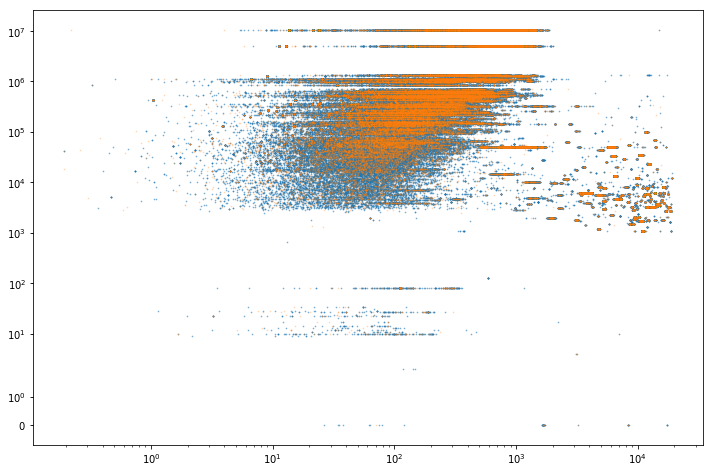

In [397]:
plt.figure(figsize=(12, 8))

plt.xscale('log')
plt.yscale('symlog')
plt.scatter(data[data['sold_fast'] == 0]['dist_city'].values,
            data[data['sold_fast'] == 0]['pop_city'].values,
            s=0.5,
            edgecolors=None,
            alpha=0.5,
            label="Did't sell")

plt.xscale('log')
plt.yscale('symlog')
plt.scatter(data[data['sold_fast'] == 1]['dist_city'].values,
            data[data['sold_fast'] == 1]['pop_city'].values,
            s=0.5,
            edgecolors=None,
            alpha=0.25,
            label="Sold")

plt.show()

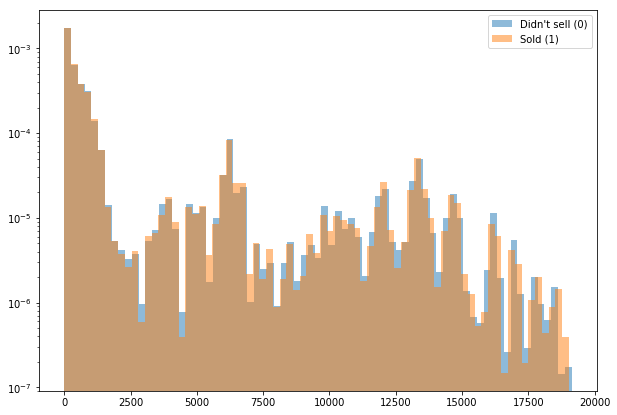

In [402]:
plot_hists(lambda data: data['dist_city'], bins=75)

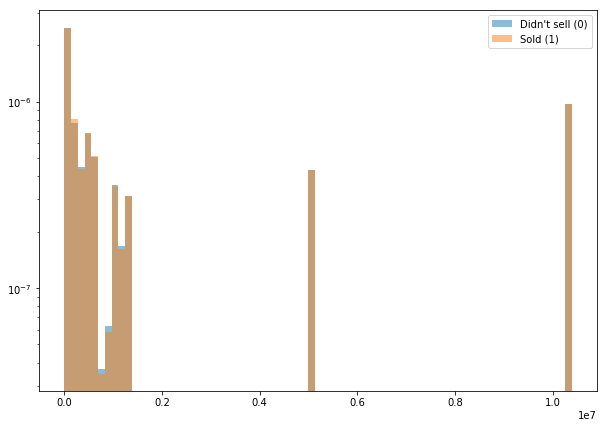

In [405]:
plot_hists(lambda data: data['pop_city'], bins=75)

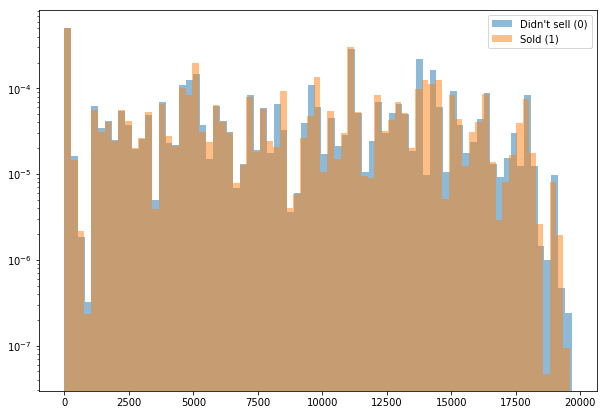

In [404]:
plot_hists(lambda data: data['dist_moscow'], bins=75)

Doesn't look like too much...

### `lat`/`long`

It seems that `lat`/`long` coords do define precise locations, like street addresses. Could be some coarse GeoIP data or just the `city`'s coords.

In [ ]:
len(set(zip(data['lat'].values, data['long'].values)))

The 2D space of these coordinates looks quite meaningful:

In [ ]:
plt.figure(figsize=(14, 10))

plt.scatter(data[data['sold_fast'] == 0]['long'].values, data[data['sold_fast'] == 0]['lat'].values,
            s=1,
#             alpha=0.5,
            edgecolors=None,
            label="Did't sell")
plt.scatter(data[data['sold_fast'] == 1]['long'].values, data[data['sold_fast'] == 1]['lat'].values,
            s=1,
            edgecolors=None,
            alpha=0.5,
            label="Sold")

plt.show()

On a closer inspection, though, two observations can be made:
1. the data points are distributed in quite a complex pattern;
2. that pattern is largely defined by cities (their locations and population sizes), and maybe the road network.

Including `lat`/`long` is worth a try, though.

### Preprocessing

Let's try to just use integer labels for everything for all nominal features.

In [415]:
from sklearn.preprocessing import LabelEncoder

data_xgb = data.copy()

region_enc = LabelEncoder()
data_xgb['region'] = region_enc.fit_transform(data_xgb['region'])

city_enc = LabelEncoder()
data_xgb['city'] = city_enc.fit_transform(data_xgb['city'])

owner_enc = LabelEncoder()
data_xgb['owner_id'] = owner_enc.fit_transform(data_xgb['owner_id'])

product_enc = LabelEncoder()
data_xgb['product_id'] = product_enc.fit_transform(data_xgb['product_id'])

In [416]:
data_xgb.head()

,category_id,city,delivery_available,img_num,lat,long,owner_id,payment_available,price,product_id,...,region,sold_mode,subcategory_id,sold_fast,day_created,weekday_created,monthday_created,dist_city,pop_city,dist_moscow
0,4,936,False,3,45.0686,38.9518,91857,True,500.0,193273,...,27,1,410,1,280,0,0.258065,168.273713,649851,13744.273699
1,4,2007,False,2,57.1840,65.5674,273673,False,300.0,81478,...,71,1,405,0,168,0,0.600000,290.558176,519119,17872.946170
2,9,1434,True,1,54.9889,73.4312,97514,True,1100.0,276180,...,42,1,908,0,211,1,1.000000,23.112940,1129281,4967.989440
3,3,1689,False,4,59.9590,30.4877,120887,True,5000.0,85410,...,31,1,312,0,106,1,0.566667,1076.796552,5028000,11160.696107
4,5,1213,False,2,55.6473,37.4118,279490,True,2000.0,120352,...,36,1,504,0,39,4,0.321429,1085.338395,10381222,0.000000


In [555]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data_xgb, test_size=0.2)

# Machine-learning pipeline and prediction

In [556]:
import xgboost as xgb

# AUC 0.633827 @1000/6/0.04/0.8
# AUC 0.634103... @1000/6/0.05/0.75

# TODO: make subcategory_id one-hot instead?
# TODO: try to introduce the population density feature?
# TODO: zoom in on a large city on the map
# TODO: maybe extract keywords from descriptions?

clf = xgb.XGBClassifier(n_estimators=200, learning_rate=0.05,
                        max_depth=6, subsample=0.75, n_jobs=4,
                        colsample_bytree=1, gamma=1)
# scale_pos_weight=1.

In [557]:
eval_set = [(
    data_test.drop(columns=['sold_fast']),
    data_test['sold_fast']
)]

clf.fit(data_train.drop(columns=['sold_fast']),
        data_train['sold_fast'],
        eval_set=eval_set,
        eval_metric=['auc'],
        verbose=True)

[0]	validation_0-auc:0.597626
[1]	validation_0-auc:0.599625
[2]	validation_0-auc:0.603051
[3]	validation_0-auc:0.603419
[4]	validation_0-auc:0.603543
[5]	validation_0-auc:0.607525
[6]	validation_0-auc:0.608022
[7]	validation_0-auc:0.610114
[8]	validation_0-auc:0.610024
[9]	validation_0-auc:0.612796
[10]	validation_0-auc:0.613996
[11]	validation_0-auc:0.614987
[12]	validation_0-auc:0.61507
[13]	validation_0-auc:0.614825
[14]	validation_0-auc:0.615878
[15]	validation_0-auc:0.616559
[16]	validation_0-auc:0.617113
[17]	validation_0-auc:0.617791
[18]	validation_0-auc:0.617988
[19]	validation_0-auc:0.618417
[20]	validation_0-auc:0.618645
[21]	validation_0-auc:0.619226
[22]	validation_0-auc:0.619199
[23]	validation_0-auc:0.619382
[24]	validation_0-auc:0.619463
[25]	validation_0-auc:0.620055
[26]	validation_0-auc:0.620524
[27]	validation_0-auc:0.621211
[28]	validation_0-auc:0.621229
[29]	validation_0-auc:0.621779
[30]	validation_0-auc:0.622123
[31]	validation_0-auc:0.62246
[32]	validation_0-au

[261]	validation_0-auc:0.636482
[262]	validation_0-auc:0.636472
[263]	validation_0-auc:0.636521
[264]	validation_0-auc:0.636519
[265]	validation_0-auc:0.63657
[266]	validation_0-auc:0.636571
[267]	validation_0-auc:0.636596
[268]	validation_0-auc:0.636568
[269]	validation_0-auc:0.636547
[270]	validation_0-auc:0.636529
[271]	validation_0-auc:0.636495
[272]	validation_0-auc:0.636505
[273]	validation_0-auc:0.63658
[274]	validation_0-auc:0.636548
[275]	validation_0-auc:0.636491
[276]	validation_0-auc:0.636506
[277]	validation_0-auc:0.636553
[278]	validation_0-auc:0.636516
[279]	validation_0-auc:0.636536
[280]	validation_0-auc:0.636529
[281]	validation_0-auc:0.636507
[282]	validation_0-auc:0.636498
[283]	validation_0-auc:0.636465
[284]	validation_0-auc:0.636461
[285]	validation_0-auc:0.636459
[286]	validation_0-auc:0.636486
[287]	validation_0-auc:0.63651
[288]	validation_0-auc:0.636516
[289]	validation_0-auc:0.636505
[290]	validation_0-auc:0.636509
[291]	validation_0-auc:0.636513
[292]	valid

[519]	validation_0-auc:0.635913
[520]	validation_0-auc:0.6359
[521]	validation_0-auc:0.635913
[522]	validation_0-auc:0.635936
[523]	validation_0-auc:0.635902
[524]	validation_0-auc:0.635915
[525]	validation_0-auc:0.635891
[526]	validation_0-auc:0.635911
[527]	validation_0-auc:0.635904
[528]	validation_0-auc:0.635953
[529]	validation_0-auc:0.635953
[530]	validation_0-auc:0.635948
[531]	validation_0-auc:0.635918
[532]	validation_0-auc:0.635869
[533]	validation_0-auc:0.635863
[534]	validation_0-auc:0.635883
[535]	validation_0-auc:0.63585
[536]	validation_0-auc:0.635865
[537]	validation_0-auc:0.635895
[538]	validation_0-auc:0.635891
[539]	validation_0-auc:0.635876
[540]	validation_0-auc:0.635877
[541]	validation_0-auc:0.635857
[542]	validation_0-auc:0.635832
[543]	validation_0-auc:0.63585
[544]	validation_0-auc:0.635802
[545]	validation_0-auc:0.635817
[546]	validation_0-auc:0.635815
[547]	validation_0-auc:0.635792
[548]	validation_0-auc:0.635794
[549]	validation_0-auc:0.635805
[550]	valida

[777]	validation_0-auc:0.635142
[778]	validation_0-auc:0.635137
[779]	validation_0-auc:0.635132
[780]	validation_0-auc:0.635139
[781]	validation_0-auc:0.635137
[782]	validation_0-auc:0.635101
[783]	validation_0-auc:0.635117
[784]	validation_0-auc:0.635119
[785]	validation_0-auc:0.635096
[786]	validation_0-auc:0.635082
[787]	validation_0-auc:0.635038
[788]	validation_0-auc:0.634996
[789]	validation_0-auc:0.634988
[790]	validation_0-auc:0.634981
[791]	validation_0-auc:0.634983
[792]	validation_0-auc:0.634981
[793]	validation_0-auc:0.634975
[794]	validation_0-auc:0.635
[795]	validation_0-auc:0.634996
[796]	validation_0-auc:0.635008
[797]	validation_0-auc:0.634997
[798]	validation_0-auc:0.635046
[799]	validation_0-auc:0.635056
[800]	validation_0-auc:0.635016
[801]	validation_0-auc:0.63499
[802]	validation_0-auc:0.634981
[803]	validation_0-auc:0.63496
[804]	validation_0-auc:0.634962
[805]	validation_0-auc:0.634901
[806]	validation_0-auc:0.634898
[807]	validation_0-auc:0.634907
[808]	validat

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1,
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=4,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.75, verbosity=1)

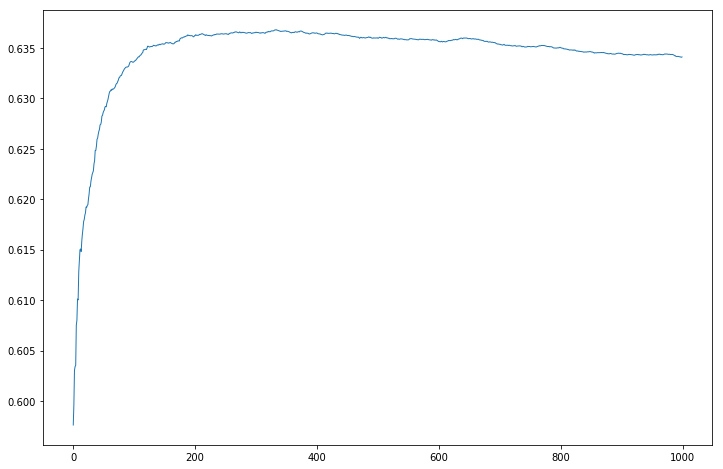

In [563]:
plt.figure(figsize=(12, 8))

plt.plot(clf.evals_result()['validation_0']['auc'], lw=1)
plt.show()

In [559]:
clf.score(data_test.drop(columns=['sold_fast']), data_test['sold_fast'])

0.7705296127562642

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


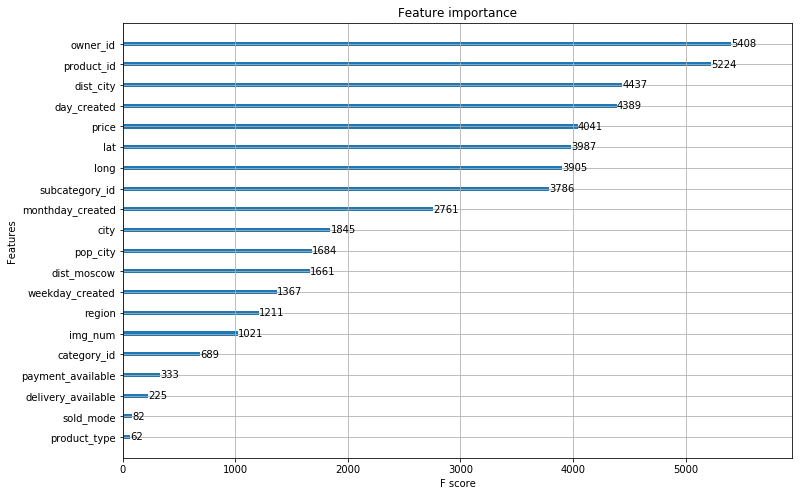

In [560]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
xgb.plot_importance(clf, ax=ax)

fig.show()

In [566]:
pred_train = clf.predict(data_train.drop(columns=['sold_fast']))
pred_test = clf.predict(data_test.drop(columns=['sold_fast']))

In [578]:
from sklearn.metrics import roc_curve

roc_curve(data_train['sold_fast'], pred_train)

(array([0.       , 0.0032436, 1.       ]),
 array([0.       , 0.0529595, 1.       ]),
 array([2, 1, 0]))

In [576]:
from sklearn.metrics import roc_auc_score

auc_train = roc_auc_score(data_train['sold_fast'], pred_train, max_fpr=0.01)
auc_test = roc_auc_score(data_test['sold_fast'], pred_test, average=None)

print("Train AUC:", auc_train)
print("Test AUC:", auc_test)

Train AUC: 0.49987467918005807
Test AUC: 0.509829629297735


In [582]:
data_xgb1 = data_xgb.copy()

data_xgb1['price'] = data_xgb1['price'].apply(np.log)

In [583]:
data_train, data_test = train_test_split(data_xgb1, test_size=0.2)

In [584]:
clf = xgb.XGBClassifier(n_estimators=200, learning_rate=0.05,
                        max_depth=6, subsample=0.75, n_jobs=4,
                        colsample_bytree=1, gamma=1)

eval_set = [(
    data_test.drop(columns=['sold_fast']),
    data_test['sold_fast']
)]

clf.fit(data_train.drop(columns=['sold_fast']),
        data_train['sold_fast'],
        eval_set=eval_set,
        eval_metric=['auc'],
        verbose=True)

[0]	validation_0-auc:0.597902
[1]	validation_0-auc:0.601793
[2]	validation_0-auc:0.60416
[3]	validation_0-auc:0.607464
[4]	validation_0-auc:0.609826
[5]	validation_0-auc:0.610354
[6]	validation_0-auc:0.61061
[7]	validation_0-auc:0.61083
[8]	validation_0-auc:0.61297
[9]	validation_0-auc:0.612545
[10]	validation_0-auc:0.612712
[11]	validation_0-auc:0.613283
[12]	validation_0-auc:0.613526
[13]	validation_0-auc:0.614797
[14]	validation_0-auc:0.615631
[15]	validation_0-auc:0.616093
[16]	validation_0-auc:0.616749
[17]	validation_0-auc:0.617116
[18]	validation_0-auc:0.617426
[19]	validation_0-auc:0.617455
[20]	validation_0-auc:0.61755
[21]	validation_0-auc:0.618446
[22]	validation_0-auc:0.618431
[23]	validation_0-auc:0.61961
[24]	validation_0-auc:0.619614
[25]	validation_0-auc:0.619614
[26]	validation_0-auc:0.619941
[27]	validation_0-auc:0.620115
[28]	validation_0-auc:0.620238
[29]	validation_0-auc:0.620385
[30]	validation_0-auc:0.620395
[31]	validation_0-auc:0.620808
[32]	validation_0-auc:0.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1,
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=4,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.75, verbosity=1)

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


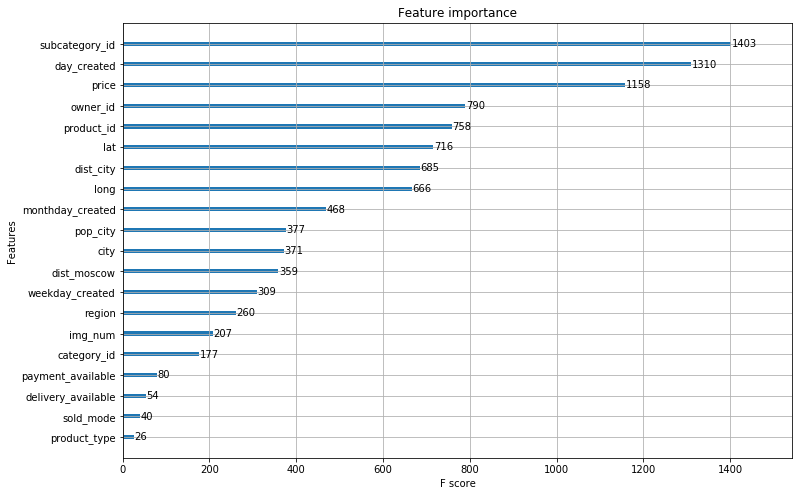

In [586]:
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
xgb.plot_importance(clf, ax=ax)

fig.show()

In [587]:
pred_train = clf.predict(data_train.drop(columns=['sold_fast']))
pred_test = clf.predict(data_test.drop(columns=['sold_fast']))

In [588]:
from sklearn.metrics import roc_auc_score

auc_train = roc_auc_score(data_train['sold_fast'], pred_train)
auc_test = roc_auc_score(data_test['sold_fast'], pred_test)

print("Train AUC:", auc_train)
print("Test AUC:", auc_test)

Train AUC: 0.5087833612311576
Test AUC: 0.5066179943421636


In [589]:
data_xgb2 = data_xgb.drop(columns=['owner_id', 'product_id'])

data_train, data_test = train_test_split(data_xgb2, test_size=0.2)

In [612]:
# 0.637375 @500/6/0.0625/0.7

clf = xgb.XGBClassifier(n_estimators=450, learning_rate=0.0625,
                        max_depth=6, subsample=0.7, n_jobs=4,
                        colsample_bytree=1, gamma=1)

eval_set = [(
    data_test.drop(columns=['sold_fast']),
    data_test['sold_fast']
)]

clf.fit(data_train.drop(columns=['sold_fast']),
        data_train['sold_fast'],
        eval_set=eval_set,
        eval_metric=['auc'],
        verbose=True)

[0]	validation_0-auc:0.601615
[1]	validation_0-auc:0.604934
[2]	validation_0-auc:0.609253
[3]	validation_0-auc:0.60995
[4]	validation_0-auc:0.610279
[5]	validation_0-auc:0.609887
[6]	validation_0-auc:0.610653
[7]	validation_0-auc:0.61168
[8]	validation_0-auc:0.613897
[9]	validation_0-auc:0.613819
[10]	validation_0-auc:0.614864
[11]	validation_0-auc:0.615012
[12]	validation_0-auc:0.615998
[13]	validation_0-auc:0.61635
[14]	validation_0-auc:0.616839
[15]	validation_0-auc:0.617266
[16]	validation_0-auc:0.617586
[17]	validation_0-auc:0.617628
[18]	validation_0-auc:0.617784
[19]	validation_0-auc:0.618109
[20]	validation_0-auc:0.618392
[21]	validation_0-auc:0.618628
[22]	validation_0-auc:0.618997
[23]	validation_0-auc:0.6193
[24]	validation_0-auc:0.620082
[25]	validation_0-auc:0.621125
[26]	validation_0-auc:0.621507
[27]	validation_0-auc:0.622032
[28]	validation_0-auc:0.622652
[29]	validation_0-auc:0.623163
[30]	validation_0-auc:0.623374
[31]	validation_0-auc:0.624499
[32]	validation_0-auc:0

[261]	validation_0-auc:0.636167
[262]	validation_0-auc:0.63608
[263]	validation_0-auc:0.636064
[264]	validation_0-auc:0.635968
[265]	validation_0-auc:0.636004
[266]	validation_0-auc:0.636056
[267]	validation_0-auc:0.636107
[268]	validation_0-auc:0.636087
[269]	validation_0-auc:0.636045
[270]	validation_0-auc:0.636031
[271]	validation_0-auc:0.635991
[272]	validation_0-auc:0.636009
[273]	validation_0-auc:0.635964
[274]	validation_0-auc:0.635984
[275]	validation_0-auc:0.636005
[276]	validation_0-auc:0.636002
[277]	validation_0-auc:0.636061
[278]	validation_0-auc:0.636034
[279]	validation_0-auc:0.636015
[280]	validation_0-auc:0.635966
[281]	validation_0-auc:0.635913
[282]	validation_0-auc:0.635925
[283]	validation_0-auc:0.63595
[284]	validation_0-auc:0.636037
[285]	validation_0-auc:0.636008
[286]	validation_0-auc:0.635998
[287]	validation_0-auc:0.635987
[288]	validation_0-auc:0.636004
[289]	validation_0-auc:0.635984
[290]	validation_0-auc:0.636022
[291]	validation_0-auc:0.636043
[292]	vali

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1,
              learning_rate=0.0625, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=450, n_jobs=4,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.675, verbosity=1)

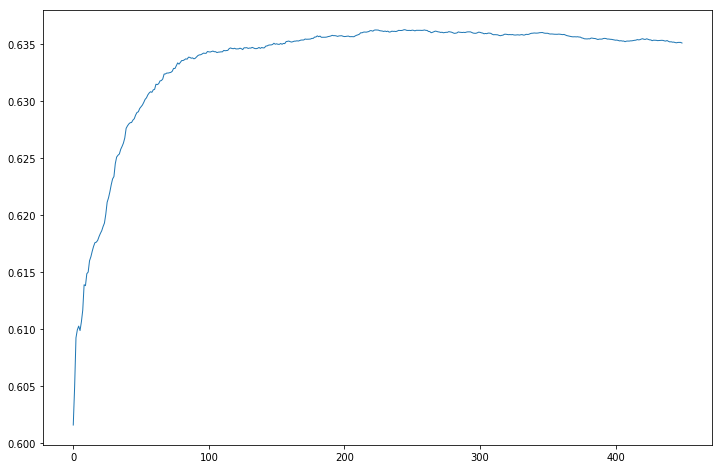

In [613]:
plt.figure(figsize=(12, 8))

plt.plot(clf.evals_result()['validation_0']['auc'], lw=1)
plt.show()

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


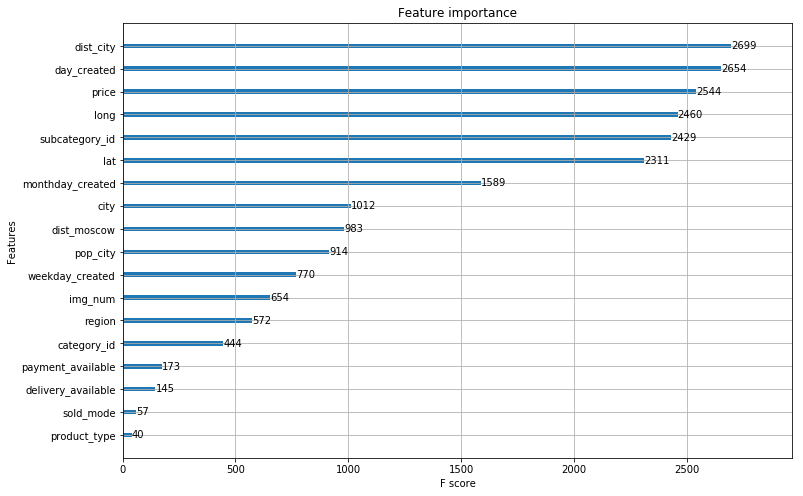

In [614]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
xgb.plot_importance(clf, ax=ax)

fig.show()

In [615]:
pred_train = clf.predict_proba(data_train.drop(columns=['sold_fast'])).T[1]
pred_test = clf.predict_proba(data_test.drop(columns=['sold_fast'])).T[1]

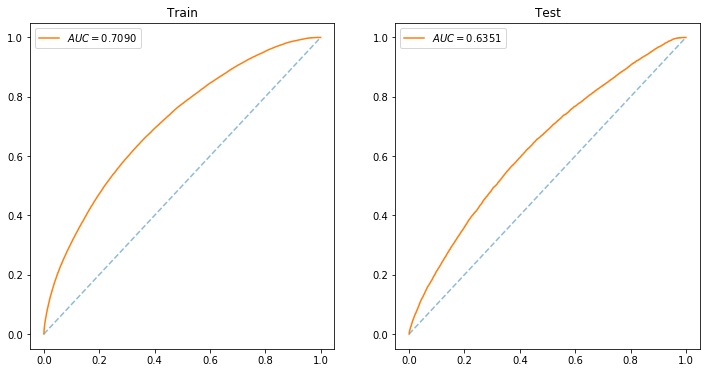

In [618]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_curve(y_true, y_pred, *, title=""):
    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.title(title)
    
    auc = roc_auc_score(y_true, y_pred)
    
    plt.plot([0, 1], [0, 1], ls='--', alpha=0.5)
    plt.plot(fpr, tpr, label="$AUC = {:.4f}$".format(auc))
    
    plt.legend()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_curve(data_train['sold_fast'], pred_train, title="Train")

plt.subplot(1, 2, 2)
plot_curve(data_test['sold_fast'], pred_test, title="Test")

plt.show()

In [652]:
nolbl = pd.read_csv("test_nolabel.tsv", sep='\t')
len(nolbl)

89251

In [655]:
from scipy.stats import zscore

def preprocessed(data):
    data = data.copy()

    data.drop(columns=["Unnamed: 0", 'desc_text', 'name_text', 'properties'], inplace=True)

    data = data[np.abs(zscore(data['price'])) < 3]
    
    data['day_created'] = data['date_created'].apply(get_orddate)
    data['weekday_created'] = data['date_created'].apply(get_weekday)
    data['monthday_created'] = data['date_created'].apply(get_monthday)
    
    data.drop(columns=['date_created'], inplace=True)
    
    data['dist_city'] = data.apply(get_dist_city, axis=1)
    data['pop_city'] = data['city'].apply(lambda city: city_data[city]['pop'])
    data['dist_moscow'] = data.apply(get_dist_moscow, axis=1)
    
    data['region'] = region_enc.fit_transform(data['region'])
    data['city'] = city_enc.fit_transform(data['city'])
    data['owner_id'] = owner_enc.fit_transform(data['owner_id'])
    data['product_id'] = product_enc.fit_transform(data['product_id'])
    
    return data

In [656]:
nolbl = preprocessed(nolbl)
nolbl.head()

,category_id,city,delivery_available,img_num,lat,long,owner_id,payment_available,price,product_id,product_type,region,sold_mode,subcategory_id,day_created,weekday_created,monthday_created,dist_city,pop_city,dist_moscow
0,9,1366,True,3,55.2639,61.3972,25423,True,650.0,46673,1,76,1,902,294,0,0.709677,5685.705692,50086,9689.700837
1,22,86,True,2,53.3426,83.7380,7782,True,750.0,41328,1,1,1,2204,312,4,0.300000,199.076984,599579,7673.279532
2,12,1388,False,4,52.0883,113.4982,60310,True,5500.0,67919,1,14,1,1202,330,1,0.900000,360.554332,308500,16146.779205
3,3,775,True,2,55.6932,37.5684,44350,True,100.0,62628,1,36,1,316,328,6,0.833333,427.561921,10381222,0.000000
4,22,113,True,2,54.7648,83.0884,70230,True,700.0,40796,1,41,1,2214,307,6,0.133333,62.846781,90250,5190.293594


In [658]:
lbls = clf.predict_proba(nolbl.drop(columns=['product_id', 'owner_id'])).T[1]
lbls

array([0.16036509, 0.0962301 , 0.32587656, ..., 0.25694743, 0.2036629 ,
       0.25720724], dtype=float32)

In [682]:
labelled = list(zip(
    product_enc.inverse_transform(nolbl['product_id'].values),
    lbls
))
len(labelled)

89249

In [687]:
lbl = pd.DataFrame.from_records(labelled, columns=['product_id', 'score']).set_index('product_id')
lbl.head()

,score
product_id,
86156cd607c3238af8982aebc99ae6a5,0.160365
76a35a1b4a2d869abfda3365d7cd4c45,0.096230
c339765b077a730a5367c5310c64128d,0.325877
b3ec786129b0b3bd7dcbce29d6d6232d,0.218549
751a58cadb565feb070c2a29dd401438,0.123622


In [688]:
lbl.to_csv("submission.csv")

# Model interpretation

Try to interpret your model results
* What **knowledge** does it reveal?